In [1]:
!pip install keras

In [26]:
#Importing libraries
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('white')
import math
import tensorflow as tf
from tensorflow import keras





In [5]:
#Features
Data = pd.read_csv('train.csv')
Data

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.00,46.000000,54,2.973333,10.500000,0.700000,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.140,171.052632,10.300000,80.060976,7.387273
1,77.0,31.00,46.000000,76,2.973333,18.333333,0.700000,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.140,151.560976,11.266667,80.670588,7.395000
2,116.0,83.00,199.500000,44,2.500000,4.666667,2.900000,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.140,124.951219,4.700000,56.700000,7.495000
3,105.0,12.00,15.000000,68,4.400000,17.666667,0.200000,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.140,545.833333,9.400000,84.600000,7.387273
4,77.0,31.00,46.000000,88,3.300000,35.000000,0.700000,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.140,62.131579,4.300000,80.060976,7.387273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,82.0,32.25,49.000000,70,3.000000,16.000000,0.700000,145.0,0.900000,68.865385,...,19.290323,97.230769,117.230769,37.004762,2.2,0.125,50.769231,14.500000,87.000000,7.381429
3995,82.0,32.25,49.000000,25,3.000000,4.400000,0.700000,117.0,0.840000,58.754774,...,17.636364,97.230769,117.820733,36.580000,2.2,0.125,584.375000,4.733333,166.400000,7.385000
3996,51.0,20.00,20.000000,44,3.000000,7.750000,0.500000,145.0,1.125000,74.166667,...,19.290323,97.230769,125.666667,37.792308,2.2,0.125,116.472222,11.066667,109.000000,7.396667
3997,169.0,1971.00,1685.333333,37,3.100000,89.250000,0.733333,145.0,9.650000,92.923077,...,19.290323,97.230769,166.615385,38.418182,2.2,0.125,11.230769,13.025000,87.400000,7.416000


In [6]:
# Labels
Labels = pd.read_csv('labels.csv')
Labels

,In-hospital_death
0,0
1,0
2,0
3,0
4,0
...,...
3994,0
3995,0
3996,0
3997,1


# Performing Exploratory Data Analysis

In [7]:
#Exploratory Data Analysis
Data.head()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.0,46.0,54,2.973333,10.500000,0.7,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.14,171.052632,10.300000,80.060976,7.387273
1,77.0,31.0,46.0,76,2.973333,18.333333,0.7,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.14,151.560976,11.266667,80.670588,7.395000
2,116.0,83.0,199.5,44,2.500000,4.666667,2.9,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.14,124.951219,4.700000,56.700000,7.495000
3,105.0,12.0,15.0,68,4.400000,17.666667,0.2,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.14,545.833333,9.400000,84.600000,7.387273
4,77.0,31.0,46.0,88,3.300000,35.000000,0.7,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.14,62.131579,4.300000,80.060976,7.387273


In [8]:
Data.describe()

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,89.259978,91.709903,130.219258,64.247562,2.975942,25.449665,1.216527,152.403601,1.363130,59.262693,...,19.223967,96.940907,118.145550,36.956291,2.368702,0.337362,133.363074,12.521058,82.799384,7.488870
std,70.397850,427.290858,590.482153,17.563142,0.404440,20.586576,2.961385,13.891279,1.406947,9.080069,...,2.074830,2.296143,16.540816,0.727382,2.418656,1.276145,117.304284,6.466063,23.117431,2.986373
min,12.000000,3.000000,6.000000,15.000000,1.100000,2.250000,0.100000,0.000000,0.200000,0.000000,...,10.543478,38.800000,0.000000,21.644615,0.300000,0.010000,0.000000,0.100000,3.500000,6.311667
25%,77.000000,31.000000,46.000000,52.500000,2.973333,13.000000,0.700000,154.000000,0.700000,55.843712,...,19.000000,97.230769,111.099359,36.614286,2.100000,0.125000,74.044118,8.900000,68.201064,7.364142
50%,77.000000,31.000000,46.000000,67.000000,2.973333,19.000000,0.700000,154.000000,0.933333,58.795833,...,19.000000,97.250000,116.891892,36.968750,2.100000,0.140000,111.032258,11.466667,80.060976,7.387273
75%,82.000000,32.250000,49.000000,78.000000,3.000000,30.000000,0.700000,154.000000,1.366667,62.210006,...,19.290323,97.250000,123.504098,37.364401,2.100000,0.140000,160.419207,14.950000,93.040476,7.407500
max,1472.333333,9143.428571,15680.000000,90.000000,5.300000,170.833333,46.366667,330.000000,16.457143,106.666667,...,39.655172,100.000000,181.725000,39.748980,49.200000,24.040000,3082.380952,137.233333,300.000000,128.532500


In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 42 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ALP          3999 non-null   float64
 1   ALT          3999 non-null   float64
 2   AST          3999 non-null   float64
 3   Age          3999 non-null   int64  
 4   Albumin      3999 non-null   float64
 5   BUN          3999 non-null   float64
 6   Bilirubin    3999 non-null   float64
 7   Cholesterol  3999 non-null   float64
 8   Creatinine   3999 non-null   float64
 9   DiasABP      3999 non-null   float64
 10  FiO2         3999 non-null   float64
 11  GCS          3999 non-null   float64
 12  Gender       3999 non-null   int64  
 13  Glucose      3999 non-null   float64
 14  HCO3         3999 non-null   float64
 15  HCT          3999 non-null   float64
 16  HR           3999 non-null   float64
 17  Height       3999 non-null   float64
 18  ICUType      3999 non-null   int64  
 19  K     

In [10]:
Labels.value_counts()

# 0 means no death 
# 1 means death 

In-hospital_death
0                    3445
1                     554
dtype: int64

In [11]:
#Encoding the label data to avoid zero bias using one_hot_encoding process
# After encoding death will be denoted by [0,1] and no death will be denoted by [1,0]
temp = []
for i in Labels["In-hospital_death"]:
    if i ==0:
        temp.append([1,0])
    else:
        temp.append([0,1])
temp = np.array(temp)
DataFrame(temp)


,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3994,1,0
3995,1,0
3996,1,0
3997,0,1


In [12]:
#concatenate features and labels
new_data = pd.concat([Data,Labels], axis=1)
new_data


,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
0,77.0,31.00,46.000000,54,2.973333,10.500000,0.700000,154.0,0.750000,58.795833,...,97.250000,116.891892,37.357143,2.1,0.140,171.052632,10.300000,80.060976,7.387273,0
1,77.0,31.00,46.000000,76,2.973333,18.333333,0.700000,154.0,1.100000,58.897059,...,96.833333,113.411765,36.939130,2.1,0.140,151.560976,11.266667,80.670588,7.395000,0
2,116.0,83.00,199.500000,44,2.500000,4.666667,2.900000,154.0,0.333333,67.125000,...,95.000000,125.687500,37.800000,2.1,0.140,124.951219,4.700000,56.700000,7.495000,0
3,105.0,12.00,15.000000,68,4.400000,17.666667,0.200000,154.0,0.766667,58.795833,...,97.250000,116.891892,36.223077,2.1,0.140,545.833333,9.400000,84.600000,7.387273,0
4,77.0,31.00,46.000000,88,3.300000,35.000000,0.700000,154.0,1.000000,58.795833,...,97.250000,116.891892,36.880000,2.1,0.140,62.131579,4.300000,80.060976,7.387273,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,82.0,32.25,49.000000,70,3.000000,16.000000,0.700000,145.0,0.900000,68.865385,...,97.230769,117.230769,37.004762,2.2,0.125,50.769231,14.500000,87.000000,7.381429,0
3995,82.0,32.25,49.000000,25,3.000000,4.400000,0.700000,117.0,0.840000,58.754774,...,97.230769,117.820733,36.580000,2.2,0.125,584.375000,4.733333,166.400000,7.385000,0
3996,51.0,20.00,20.000000,44,3.000000,7.750000,0.500000,145.0,1.125000,74.166667,...,97.230769,125.666667,37.792308,2.2,0.125,116.472222,11.066667,109.000000,7.396667,0
3997,169.0,1971.00,1685.333333,37,3.100000,89.250000,0.733333,145.0,9.650000,92.923077,...,97.230769,166.615385,38.418182,2.2,0.125,11.230769,13.025000,87.400000,7.416000,1


#Using Correlation heatmap to find relationship between the variables

<AxesSubplot:>

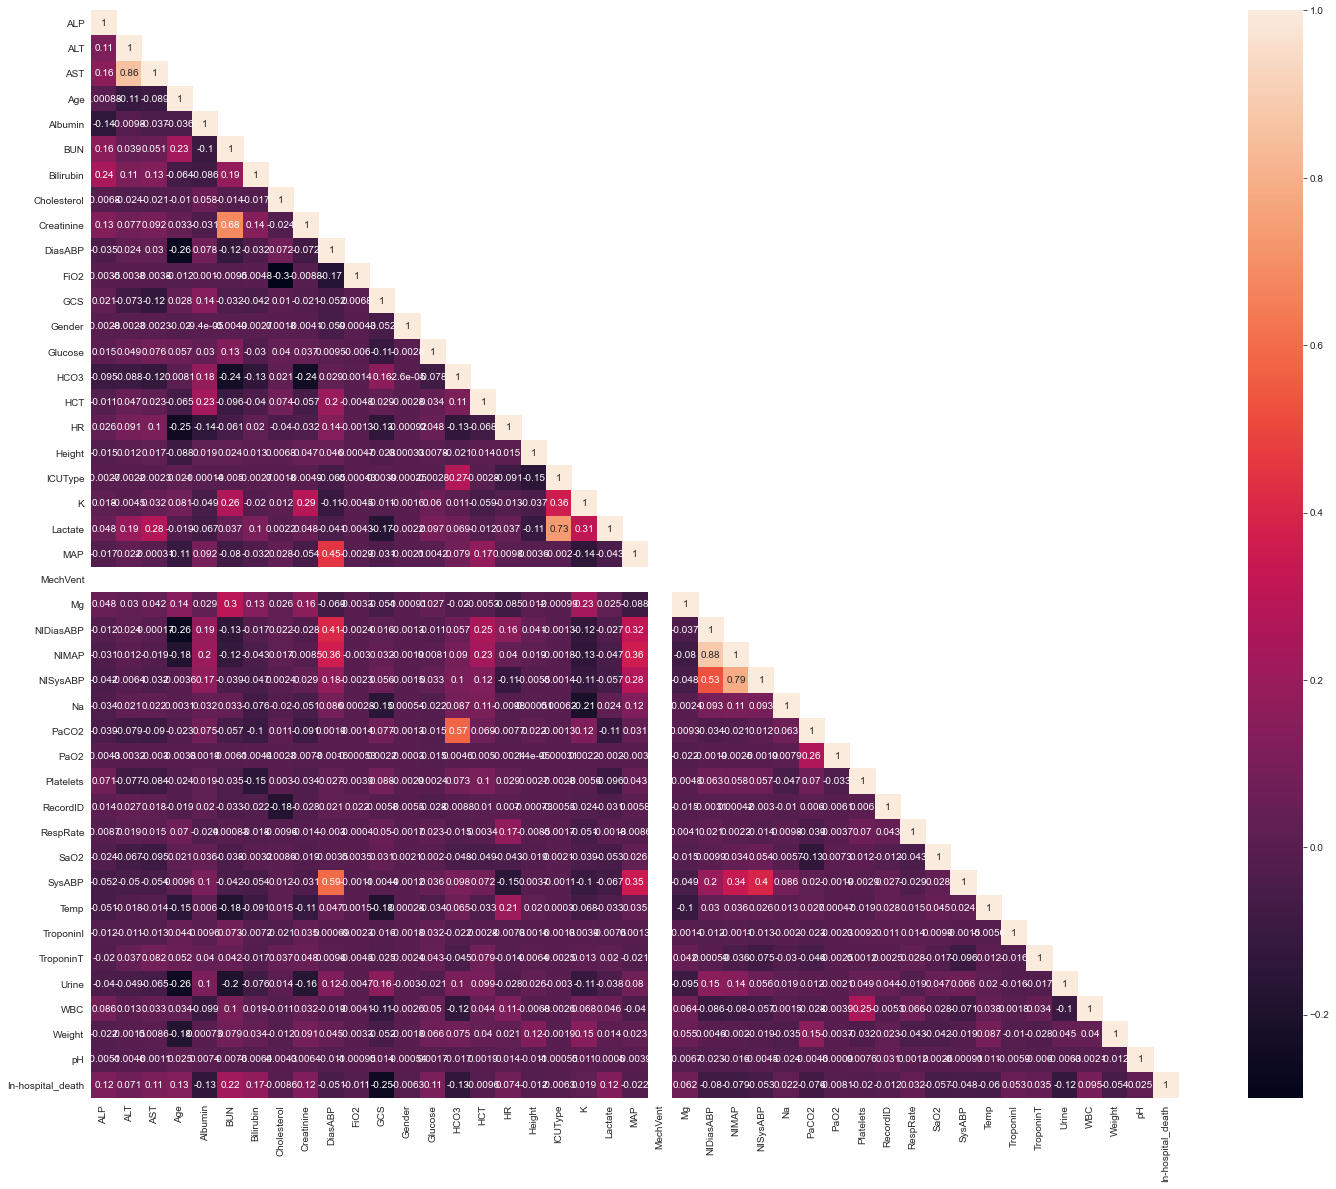

In [13]:
correlation_map = new_data[new_data.columns].corr()
obj= np.array(correlation_map)
obj[np.tril_indices_from(obj)]=False
fig,ax=plt.subplots()
fig.set_size_inches(25,20)
sns.heatmap(correlation_map,mask=obj,square=True,annot=True)

In [14]:
#more explicit showing the correlation values
correlation_values = new_data[new_data.columns].corr()
correlation_values

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH,In-hospital_death
ALP,1.000000,0.114850,0.155750,0.000879,-0.137771,0.155416,0.240297,-0.006795,0.131899,-0.035320,...,-0.024257,-0.052407,-0.051107,-0.011932,-0.019689,-0.040027,0.085952,-0.021914,-0.005073,0.115577
ALT,0.114850,1.000000,0.858741,-0.112012,-0.009850,0.038541,0.109332,-0.024351,0.077210,0.024430,...,-0.067018,-0.050335,-0.017507,-0.011350,0.037490,-0.048773,0.013325,-0.001541,-0.004561,0.070992
AST,0.155750,0.858741,1.000000,-0.088649,-0.037277,0.051244,0.127767,-0.020751,0.092024,0.030425,...,-0.095091,-0.053931,-0.014374,-0.012664,0.081825,-0.064821,0.032749,0.008551,-0.001068,0.108484
Age,0.000879,-0.112012,-0.088649,1.000000,-0.036231,0.228768,-0.063837,-0.010103,0.033369,-0.263634,...,0.021496,0.009608,-0.146972,0.043898,0.051547,-0.255105,0.034414,-0.177945,0.025433,0.130701
Albumin,-0.137771,-0.009850,-0.037277,-0.036231,1.000000,-0.100987,-0.086068,0.058119,-0.030867,0.077583,...,0.035633,0.103017,0.006044,0.009577,0.039915,0.102044,-0.099285,0.000732,0.007397,-0.126925
BUN,0.155416,0.038541,0.051244,0.228768,-0.100987,1.000000,0.185473,-0.014453,0.683278,-0.119703,...,-0.037919,-0.042018,-0.182530,0.072952,0.042128,-0.195167,0.101356,0.079346,-0.007620,0.223369
Bilirubin,0.240297,0.109332,0.127767,-0.063837,-0.086068,0.185473,1.000000,-0.017119,0.140630,-0.031563,...,-0.003182,-0.053594,-0.091075,-0.007221,-0.016851,-0.076323,0.018515,0.033972,-0.006371,0.174017
Cholesterol,-0.006795,-0.024351,-0.020751,-0.010103,0.058119,-0.014453,-0.017119,1.000000,-0.023809,0.072380,...,0.008578,0.011681,0.014865,-0.021201,0.036640,0.013926,-0.010553,-0.012247,-0.004304,-0.008578
Creatinine,0.131899,0.077210,0.092024,0.033369,-0.030867,0.683278,0.140630,-0.023809,1.000000,-0.072456,...,-0.019475,-0.030945,-0.108552,0.034726,0.047885,-0.162525,0.032108,0.091286,0.006364,0.117615
DiasABP,-0.035320,0.024430,0.030425,-0.263634,0.077583,-0.119703,-0.031563,0.072380,-0.072456,1.000000,...,-0.003486,0.594665,0.047105,0.000694,0.009634,0.119911,-0.019035,0.045176,-0.011028,-0.050506


In [15]:
#Creating a new data frame and dropping uncorrelated columns and also sepearting features from labels
new_df =new_data.drop(['In-hospital_death'], axis=1)
new_df

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Cholesterol,Creatinine,DiasABP,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.00,46.000000,54,2.973333,10.500000,0.700000,154.0,0.750000,58.795833,...,17.428571,97.250000,116.891892,37.357143,2.1,0.140,171.052632,10.300000,80.060976,7.387273
1,77.0,31.00,46.000000,76,2.973333,18.333333,0.700000,154.0,1.100000,58.897059,...,19.000000,96.833333,113.411765,36.939130,2.1,0.140,151.560976,11.266667,80.670588,7.395000
2,116.0,83.00,199.500000,44,2.500000,4.666667,2.900000,154.0,0.333333,67.125000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.140,124.951219,4.700000,56.700000,7.495000
3,105.0,12.00,15.000000,68,4.400000,17.666667,0.200000,154.0,0.766667,58.795833,...,15.457627,97.250000,116.891892,36.223077,2.1,0.140,545.833333,9.400000,84.600000,7.387273
4,77.0,31.00,46.000000,88,3.300000,35.000000,0.700000,154.0,1.000000,58.795833,...,19.166667,97.250000,116.891892,36.880000,2.1,0.140,62.131579,4.300000,80.060976,7.387273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,82.0,32.25,49.000000,70,3.000000,16.000000,0.700000,145.0,0.900000,68.865385,...,19.290323,97.230769,117.230769,37.004762,2.2,0.125,50.769231,14.500000,87.000000,7.381429
3995,82.0,32.25,49.000000,25,3.000000,4.400000,0.700000,117.0,0.840000,58.754774,...,17.636364,97.230769,117.820733,36.580000,2.2,0.125,584.375000,4.733333,166.400000,7.385000
3996,51.0,20.00,20.000000,44,3.000000,7.750000,0.500000,145.0,1.125000,74.166667,...,19.290323,97.230769,125.666667,37.792308,2.2,0.125,116.472222,11.066667,109.000000,7.396667
3997,169.0,1971.00,1685.333333,37,3.100000,89.250000,0.733333,145.0,9.650000,92.923077,...,19.290323,97.230769,166.615385,38.418182,2.2,0.125,11.230769,13.025000,87.400000,7.416000


In [16]:
dropped_df = new_df
dropped_df = new_df.drop(['Gender','Cholesterol','HCT','ICUType','Height'], axis=1)
dropped_df 

,ALP,ALT,AST,Age,Albumin,BUN,Bilirubin,Creatinine,DiasABP,FiO2,...,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight,pH
0,77.0,31.00,46.000000,54,2.973333,10.500000,0.700000,0.750000,58.795833,0.526667,...,17.428571,97.250000,116.891892,37.357143,2.1,0.140,171.052632,10.300000,80.060976,7.387273
1,77.0,31.00,46.000000,76,2.973333,18.333333,0.700000,1.100000,58.897059,0.560000,...,19.000000,96.833333,113.411765,36.939130,2.1,0.140,151.560976,11.266667,80.670588,7.395000
2,116.0,83.00,199.500000,44,2.500000,4.666667,2.900000,0.333333,67.125000,0.500000,...,19.000000,95.000000,125.687500,37.800000,2.1,0.140,124.951219,4.700000,56.700000,7.495000
3,105.0,12.00,15.000000,68,4.400000,17.666667,0.200000,0.766667,58.795833,0.526667,...,15.457627,97.250000,116.891892,36.223077,2.1,0.140,545.833333,9.400000,84.600000,7.387273
4,77.0,31.00,46.000000,88,3.300000,35.000000,0.700000,1.000000,58.795833,0.526667,...,19.166667,97.250000,116.891892,36.880000,2.1,0.140,62.131579,4.300000,80.060976,7.387273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,82.0,32.25,49.000000,70,3.000000,16.000000,0.700000,0.900000,68.865385,0.442857,...,19.290323,97.230769,117.230769,37.004762,2.2,0.125,50.769231,14.500000,87.000000,7.381429
3995,82.0,32.25,49.000000,25,3.000000,4.400000,0.700000,0.840000,58.754774,0.528175,...,17.636364,97.230769,117.820733,36.580000,2.2,0.125,584.375000,4.733333,166.400000,7.385000
3996,51.0,20.00,20.000000,44,3.000000,7.750000,0.500000,1.125000,74.166667,0.412500,...,19.290323,97.230769,125.666667,37.792308,2.2,0.125,116.472222,11.066667,109.000000,7.396667
3997,169.0,1971.00,1685.333333,37,3.100000,89.250000,0.733333,9.650000,92.923077,0.533333,...,19.290323,97.230769,166.615385,38.418182,2.2,0.125,11.230769,13.025000,87.400000,7.416000


# Performing Feature Scaling 

In [17]:
#importing libraries for scaling using the min-max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
dropped_df = scaler.fit_transform(dropped_df)
DataFrame(dropped_df)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.044510,0.003063,0.002552,0.520000,0.446032,0.048937,0.012968,0.033831,0.551211,1.774459e-06,...,0.236506,0.955065,0.643235,0.867886,0.036810,0.005410,0.055494,0.074380,0.258216,0.008801
1,0.044510,0.003063,0.002552,0.813333,0.446032,0.095403,0.012968,0.055360,0.552160,2.010424e-06,...,0.290485,0.948257,0.624085,0.844797,0.036810,0.005410,0.049170,0.081429,0.260272,0.008864
2,0.071217,0.008752,0.012345,0.386667,0.333333,0.014335,0.060519,0.008202,0.629297,1.585687e-06,...,0.290485,0.918301,0.691636,0.892348,0.036810,0.005410,0.040537,0.033544,0.179427,0.009682
3,0.063684,0.000985,0.000574,0.706667,0.785714,0.091448,0.002161,0.034856,0.551211,1.774459e-06,...,0.168803,0.955065,0.643235,0.805246,0.036810,0.005410,0.177082,0.067817,0.273524,0.008801
4,0.044510,0.003063,0.002552,0.973333,0.523810,0.194266,0.012968,0.049209,0.551211,1.774459e-06,...,0.296210,0.955065,0.643235,0.841531,0.036810,0.005410,0.020157,0.030627,0.258216,0.008801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.047934,0.003200,0.002743,0.733333,0.452381,0.081562,0.012968,0.043058,0.645613,1.181175e-06,...,0.300458,0.954751,0.645100,0.848422,0.038855,0.004786,0.016471,0.105007,0.281619,0.008753
3995,0.047934,0.003200,0.002743,0.133333,0.452381,0.012753,0.012968,0.039367,0.550826,1.785133e-06,...,0.243644,0.954751,0.648346,0.824960,0.038855,0.004786,0.189586,0.033787,0.549410,0.008782
3996,0.026706,0.001860,0.000893,0.386667,0.452381,0.032625,0.008646,0.056898,0.695312,9.662778e-07,...,0.300458,0.954751,0.691521,0.891923,0.038855,0.004786,0.037786,0.079971,0.355818,0.008877
3997,0.107510,0.215307,0.107141,0.293333,0.476190,0.516065,0.013689,0.581283,0.871154,1.821652e-06,...,0.300458,0.954751,0.916855,0.926493,0.038855,0.004786,0.003644,0.094251,0.282968,0.009036


# Building our Neural Network Model

In [18]:
X = dropped_df
DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.044510,0.003063,0.002552,0.520000,0.446032,0.048937,0.012968,0.033831,0.551211,1.774459e-06,...,0.236506,0.955065,0.643235,0.867886,0.036810,0.005410,0.055494,0.074380,0.258216,0.008801
1,0.044510,0.003063,0.002552,0.813333,0.446032,0.095403,0.012968,0.055360,0.552160,2.010424e-06,...,0.290485,0.948257,0.624085,0.844797,0.036810,0.005410,0.049170,0.081429,0.260272,0.008864
2,0.071217,0.008752,0.012345,0.386667,0.333333,0.014335,0.060519,0.008202,0.629297,1.585687e-06,...,0.290485,0.918301,0.691636,0.892348,0.036810,0.005410,0.040537,0.033544,0.179427,0.009682
3,0.063684,0.000985,0.000574,0.706667,0.785714,0.091448,0.002161,0.034856,0.551211,1.774459e-06,...,0.168803,0.955065,0.643235,0.805246,0.036810,0.005410,0.177082,0.067817,0.273524,0.008801
4,0.044510,0.003063,0.002552,0.973333,0.523810,0.194266,0.012968,0.049209,0.551211,1.774459e-06,...,0.296210,0.955065,0.643235,0.841531,0.036810,0.005410,0.020157,0.030627,0.258216,0.008801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0.047934,0.003200,0.002743,0.733333,0.452381,0.081562,0.012968,0.043058,0.645613,1.181175e-06,...,0.300458,0.954751,0.645100,0.848422,0.038855,0.004786,0.016471,0.105007,0.281619,0.008753
3995,0.047934,0.003200,0.002743,0.133333,0.452381,0.012753,0.012968,0.039367,0.550826,1.785133e-06,...,0.243644,0.954751,0.648346,0.824960,0.038855,0.004786,0.189586,0.033787,0.549410,0.008782
3996,0.026706,0.001860,0.000893,0.386667,0.452381,0.032625,0.008646,0.056898,0.695312,9.662778e-07,...,0.300458,0.954751,0.691521,0.891923,0.038855,0.004786,0.037786,0.079971,0.355818,0.008877
3997,0.107510,0.215307,0.107141,0.293333,0.476190,0.516065,0.013689,0.581283,0.871154,1.821652e-06,...,0.300458,0.954751,0.916855,0.926493,0.038855,0.004786,0.003644,0.094251,0.282968,0.009036


In [19]:
y = temp
DataFrame(y)

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3994,1,0
3995,1,0
3996,1,0
3997,0,1


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state= 42)

In [21]:
DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.052728,0.007986,0.003764,0.746667,0.446032,0.107266,0.017291,0.059461,0.551211,1.774459e-06,...,0.290485,0.955065,0.643235,0.831589,0.036810,0.005410,0.138894,0.045211,0.274874,0.008768
1,0.047934,0.003200,0.002743,1.000000,0.452381,0.097380,0.012968,0.065612,0.498566,2.647530e-06,...,0.300458,0.948010,0.624435,0.841683,0.038855,0.004786,0.050222,0.106466,0.277487,0.008900
2,0.047934,0.003200,0.002743,0.106667,0.452381,0.026693,0.012968,0.010764,0.514309,9.523062e-07,...,0.300458,0.954751,0.667965,0.865931,0.038855,0.004786,0.056349,0.071099,0.190556,0.008659
3,0.044510,0.003063,0.002552,0.866667,0.446032,0.138903,0.012968,0.047159,0.551211,1.774459e-06,...,0.240868,0.955065,0.643235,0.812563,0.036810,0.005410,0.145106,0.085075,0.373356,0.008801
4,0.032184,0.001422,0.001531,0.666667,0.690476,0.332674,0.002161,0.106620,0.623785,5.710360e-07,...,0.290485,0.959150,0.801781,0.884457,0.036810,0.005410,0.053607,0.185707,0.186461,0.008843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2794,0.052043,0.001203,0.003828,0.866667,0.380952,0.115175,0.017291,0.045108,0.506250,1.332867e-06,...,0.290485,0.967320,0.728718,0.833737,0.036810,0.005410,0.021250,0.045941,0.156830,0.008352
2795,0.044510,0.003063,0.002552,0.946667,0.446032,0.040040,0.012968,0.030756,0.512195,2.815190e-06,...,0.290485,0.950980,0.670002,0.891774,0.036810,0.002164,0.064518,0.128342,0.209326,0.008879
2796,0.044510,0.003063,0.002552,0.826667,0.446032,0.111221,0.012968,0.049209,0.491164,1.774459e-06,...,0.173892,0.955065,0.703412,0.854185,0.036810,0.005410,0.018654,0.062713,0.198314,0.008801
2797,0.047934,0.003200,0.002743,0.733333,0.500000,0.060801,0.012968,0.018453,0.550826,5.238429e-07,...,0.300458,0.954751,0.648346,0.846778,0.038855,0.004786,0.032824,0.027346,0.251265,0.008283


In [22]:
DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.044510,0.003063,0.002552,0.413333,0.446032,0.079585,0.012968,0.008202,0.551211,3.507118e-06,...,0.322733,0.934641,0.643235,0.803971,0.036810,0.005410,0.071059,0.079485,0.227787,0.008823
1,0.047934,0.003200,0.002743,0.146667,0.452381,0.049926,0.012968,0.036907,0.612868,1.907457e-06,...,0.300458,0.954751,0.776113,0.880687,0.038855,0.004786,0.077051,0.144142,0.325464,0.008975
2,0.044510,0.003063,0.002552,0.933333,0.446032,0.102323,0.012968,0.030756,0.505748,2.293582e-06,...,0.290485,0.975490,0.663876,0.796475,0.036810,0.005410,0.047187,0.081308,0.177474,0.008986
3,0.044510,0.003063,0.002552,0.773333,0.595238,0.714286,0.012968,0.352665,0.551211,1.774459e-06,...,0.237276,0.955065,0.643235,0.840795,0.036810,0.005410,0.078673,0.037919,0.274874,0.008801
4,0.160922,0.001258,0.001627,0.733333,0.309524,0.212061,0.028098,0.071178,0.522222,1.703669e-06,...,0.290485,0.955065,0.606431,0.768989,0.036810,0.001248,0.014471,0.090788,0.002467,0.008875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.044510,0.003063,0.002552,0.786667,0.446032,0.127533,0.012968,0.058436,0.547995,1.335841e-06,...,0.290485,0.960784,0.560353,0.866505,0.036810,0.088639,0.025922,0.153136,0.293761,0.008980
1196,0.047934,0.003200,0.002743,0.760000,0.476190,0.192289,0.012968,0.071763,0.447554,5.238429e-07,...,0.280764,0.885621,0.515351,0.837537,0.038855,0.004786,0.029958,0.125912,0.258010,0.008536
1197,0.044510,0.003063,0.002552,1.000000,0.446032,0.532378,0.012968,0.151728,0.523935,1.090160e-06,...,0.290485,0.955065,0.647832,0.803971,0.036810,0.005410,0.035645,0.213904,0.291400,0.007993
1198,0.044510,0.003063,0.002552,0.453333,0.446032,0.030153,0.012968,0.016403,0.596317,1.774459e-06,...,0.194040,0.955065,0.702494,0.851105,0.036810,0.005410,0.079721,0.092611,0.190556,0.008801


In [23]:
DataFrame(y_train)

,0,1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
2794,0,1
2795,0,1
2796,1,0
2797,1,0


In [24]:
DataFrame(y_test)

,0,1
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
1195,1,0
1196,1,0
1197,1,0
1198,1,0


In [32]:
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, BatchNormalization
# from keras.optimizers import Adam,RMSprop

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization


from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow import keras

In [33]:
model = Sequential()
model.add(Dense(64,input_dim=X_train.shape[1],activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(196,activation='relu'))
model.add(Dense(196,activation='relu'))

model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='sigmoid'))


In [34]:
#compiling the model
model.compile(optimizer=Adam(lr=0.0005),loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 64)                2432      
_________________________________________________________________
dense_10 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_11 (Dense)             (None, 196)               25284     
_________________________________________________________________
dense_12 (Dense)             (None, 196)               38612     
_________________________________________________________________
batch_normalization (BatchNo (None, 196)               784       
_________________________________________________________________
dense_13 (Dense)             (None, 256)               50432     
_________________________________________________________________
dense_14 (Dense)             (None, 2)                

# Fitting the model

In [36]:
model_fit = model.fit(X_train,y_train,epochs=20,batch_size=128,validation_data=(X_test,y_test))

Epoch 1/20
22/22 [==============================] - 0s 22ms/step - loss: 0.4402 - accuracy: 0.8585 - val_loss: 0.5567 - val_accuracy: 0.8642
Epoch 2/20
22/22 [==============================] - 0s 8ms/step - loss: 0.3420 - accuracy: 0.8678 - val_loss: 0.5596 - val_accuracy: 0.8642
Epoch 3/20
22/22 [==============================] - 0s 8ms/step - loss: 0.3280 - accuracy: 0.8689 - val_loss: 0.5253 - val_accuracy: 0.8642
Epoch 4/20
22/22 [==============================] - 0s 8ms/step - loss: 0.3232 - accuracy: 0.8707 - val_loss: 0.5014 - val_accuracy: 0.8642
Epoch 5/20
22/22 [==============================] - 0s 8ms/step - loss: 0.3101 - accuracy: 0.8746 - val_loss: 0.5129 - val_accuracy: 0.8642
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 0.3002 - accuracy: 0.8760 - val_loss: 0.5033 - val_accuracy: 0.8642
Epoch 7/20
22/22 [==============================] - 0s 8ms/step - loss: 0.2938 - accuracy: 0.8782 - val_loss: 0.5008 - val_accuracy: 0.8642
Epoch 8/20
22/22 [=

# Evaluating Performance of Model

In [40]:
model_fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

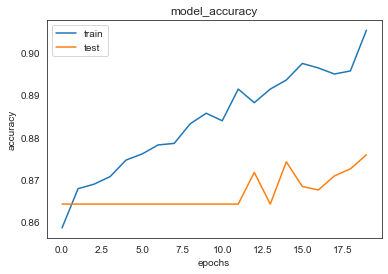

In [41]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

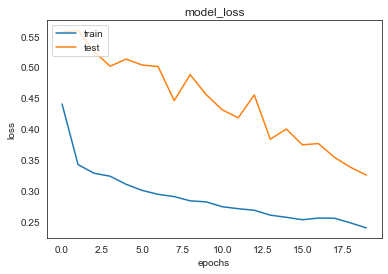

In [42]:
#summary for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_true = np.argmax(y_test,axis=1)



In [45]:
cm = confusion_matrix(y_true,y_pred)
cm

array([[1030,    7],
       [ 142,   21]], dtype=int64)

In [46]:
print(accuracy_score(y_true,y_pred))

0.8758333333333334
